In [1]:
import pandas as pd

# Load Dataset...
data = pd.read_csv('seattle-weather.csv')
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [3]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

<Axes: title={'center': 'Temperature Trends'}>

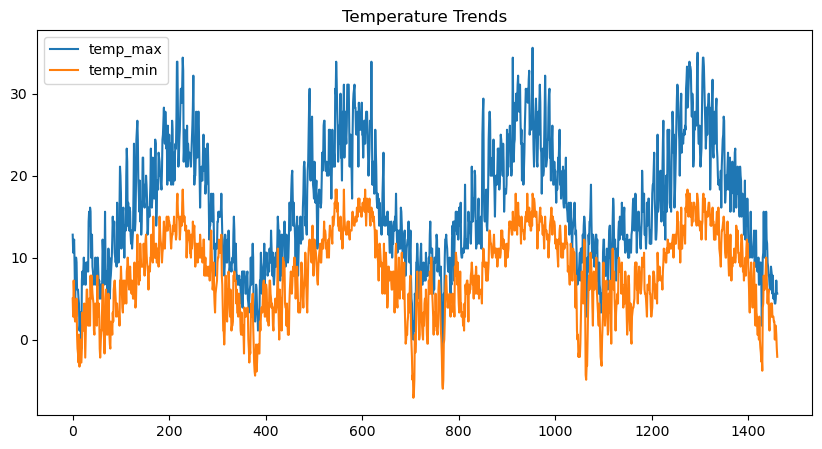

In [4]:
### Visualize the data 
data[['temp_max', 'temp_min']].plot(figsize=(10, 5), title='Temperature Trends')

In [5]:
data['date'] = pd.to_datetime(data['date'])

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['weather'] = le.fit_transform(data['weather'])
data['weather'].unique()

array([0, 2, 4, 3, 1])

In [7]:
# Drop target and unnecessary columns

data.drop(columns="date", inplace=True)
x = data.drop(columns=["weather"])
y = data["weather"]

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit_transform(x)

x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [9]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=32)

In [10]:
# Apply Model...
from sklearn.tree import DecisionTreeClassifier

In [11]:
# DecisionTreeClassifier 

dt = DecisionTreeClassifier( max_depth=5)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)*100 , dt.score(x_train,y_train)*100

(87.37201365187714, 85.95890410958904)

In [12]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, dt.predict(x_test))
cf

array([[  3,   0,   0,   0,  12],
       [  0,   0,   0,   0,  19],
       [  0,   0, 111,   0,   3],
       [  0,   0,   3,   2,   0],
       [  0,   0,   0,   0, 140]], dtype=int64)

In [13]:
dt.predict(x_test)

array([2, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2,
       2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4,
       2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2,
       4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 2,
       2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 0,
       4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 3, 4, 4,
       2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 0, 2, 4, 4, 2, 4, 4,
       4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4,
       2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 2, 4, 2, 4, 3, 4, 2, 4, 4, 2, 2, 4, 2, 4, 0, 2, 4,
       4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 2,
       2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2,
       4, 4, 4, 4, 2, 2, 4])

In [14]:
y_test.head(7)

363     2
529     4
1395    1
803     2
832     4
661     4
851     4
Name: weather, dtype: int32

In [15]:
import numpy as np
input_data = np.array([[0.0, 10.0, 2.8,	2.0]])  # [precipitation, temp_max, temp_min, wind]---> Sun.

input_data = sc.transform(input_data)
prediction = dt.predict(input_data)


# Print the result
if prediction[0] == 0:
        print("drizzle")
elif prediction[0] == 1:
        print("Fog")
elif prediction[0] == 2:
        print("Rain")
elif prediction[0] == 3:
        print("Snow")
elif prediction[0] == 4:
        print("Sun")
else:
        print("Invalid Input")

Sun


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [16]:
data.head(8)

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2
5,2.5,4.4,2.2,2.2,2
6,0.0,7.2,2.8,2.3,2
7,0.0,10.0,2.8,2.0,4


In [17]:
# Download Model...

import pickle

pickle.dump((dt,sc),open("weather_model.pkl","wb"))